###Projeto Machine Learning I

Usamos o dataset Stroke Prediction Dataset

Link para o dataset utilizado: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset



In [ ]:
#Importando as bibs importantes
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#importando o dataset
df = pd.read_csv('../content/healthcare-dataset-stroke-data.csv')

In [ ]:
#verificando se a importação foi feita corretamente
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df = df.drop(columns='id')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
#arredondando a idade para fazer mais sentido
df['age'] = df['age'].apply(lambda x : round(x))


<ipython-input-387-98eb8d10a6fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

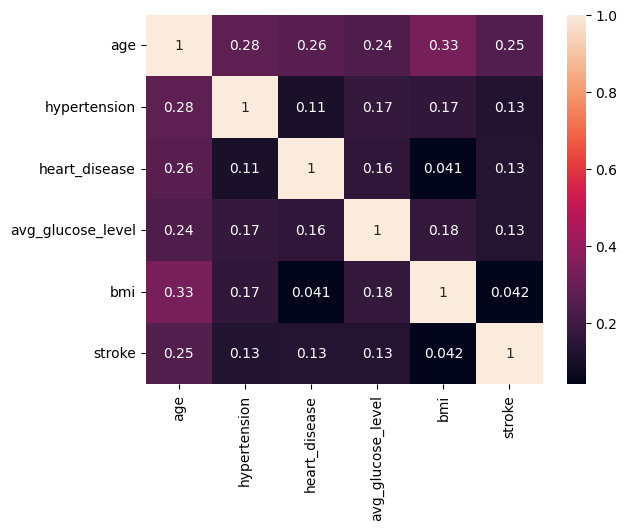

In [ ]:
#plotando o heatmap da correlação para saber se podemos dropar alguma coluna
corr = df.corr()
sns.heatmap(corr, annot=True)

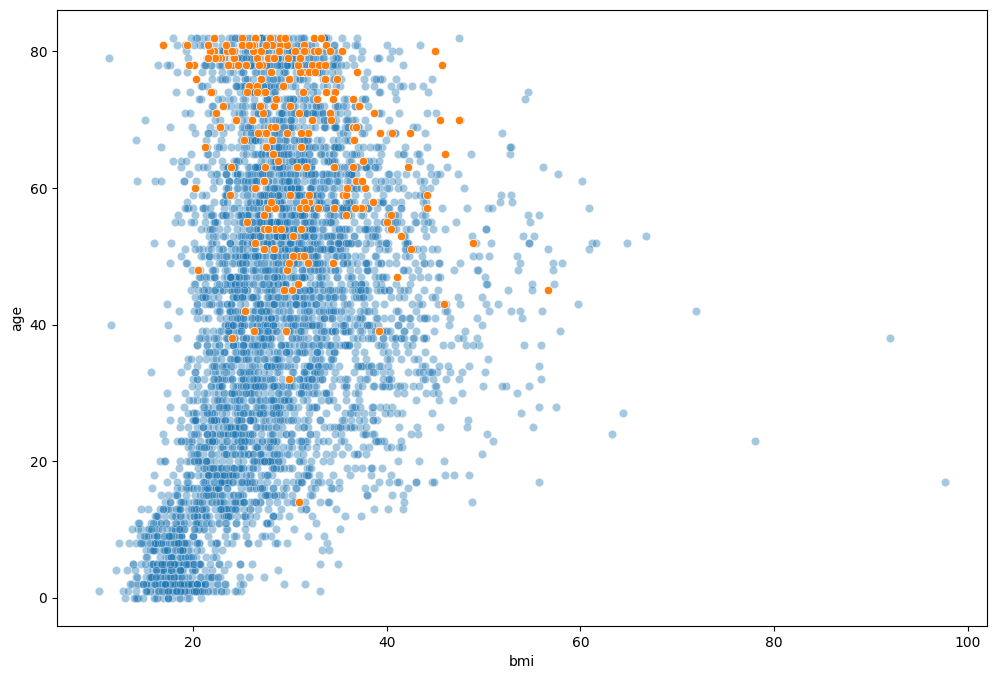

In [ ]:
# Idade vs BMI com contraste para casos positivos de ataque do coração
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="bmi", y="age", alpha=0.4, data=df[df['stroke'] == 0])
sns.scatterplot(x="bmi", y="age", alpha=1, data=df[df['stroke'] == 1], ax=ax)
plt.show()

In [ ]:
#substituindo os bmi's maiores que 50 e menores que 15 por não haver muitas
# na prática pessoas com estes valores de IMC
df['bmi'] = df['bmi'].apply(lambda bmi_value: bmi_value if 15 <
                            bmi_value < 50 else np.nan)

In [ ]:
#verificando se os outliers do bmi foram excluídos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4786 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 439.3+ KB


In [ ]:
df['bmi'].describe()

count    4786.000000
mean       28.578625
std         6.901580
min        15.100000
25%        23.600000
50%        28.000000
75%        32.800000
max        49.900000
Name: bmi, dtype: float64

In [ ]:
#preenchendo o índice de massa corporal pela média da idade da entrada
#para aqueles casos em que temos NaN
mean_values = df.groupby('age')['bmi'].transform('mean')
df['bmi'].fillna(mean_values, inplace=True)

In [ ]:
df['bmi'].describe()

count    5110.000000
mean       28.563185
std         6.763030
min        15.100000
25%        23.700000
50%        28.250000
75%        32.400000
max        49.900000
Name: bmi, dtype: float64

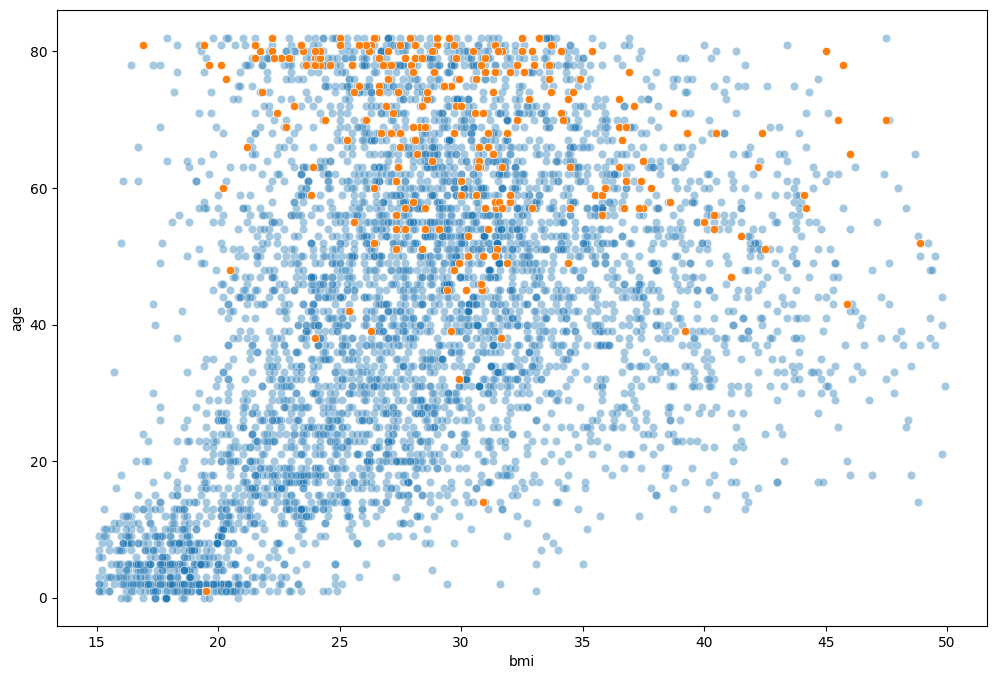

In [ ]:
# Idadae vs BMI com contraste para casos positivos de ataque do coração
# após transformações no bmi
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="bmi", y="age", alpha=0.4, data=df[df['stroke'] == 0])
sns.scatterplot(x="bmi", y="age", alpha=1, data=df[df['stroke'] == 1], ax=ax)
plt.show()

In [ ]:
#verificando se existe algum valor Nan ainda na base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 439.3+ KB


In [ ]:
#checando se os dados de stroke estão muito desbalanceados
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
df["stroke"].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

<ipython-input-398-98eb8d10a6fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

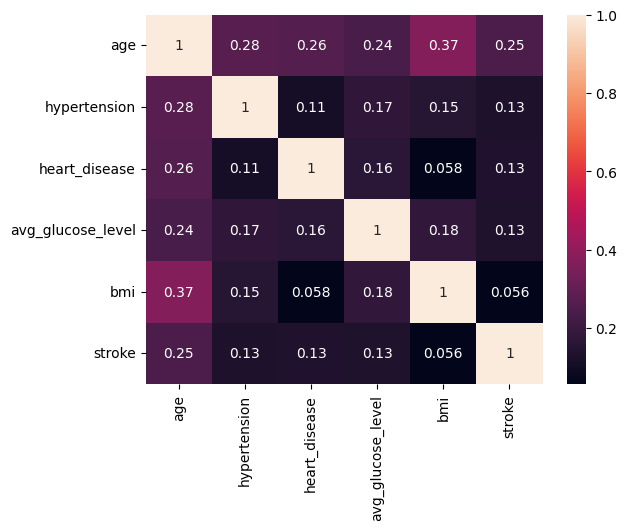

In [ ]:
#plotando o heatmap da correlação para saber se podemos dropar alguma coluna
corr = df.corr()
sns.heatmap(corr, annot=True)

In [ ]:
#transformando as colunas object em colunas int64 para ver a correlaçao
from sklearn.preprocessing import LabelEncoder

# Iniciando o LabelEncoder
label_encoder = LabelEncoder()

# Selecionando as colunas objeto para encodar
colunas_encodar = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Aplicando o label enconder para estas colunas
for col in colunas_encodar:
    df[col] = label_encoder.fit_transform(df[col])

# Verificando se a encodação foi correta
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.600000,1,1
1,0,61,0,0,1,3,0,202.21,29.983824,2,1
2,1,80,0,1,1,2,0,105.92,32.500000,2,1
3,0,49,0,0,1,2,1,171.23,34.400000,3,1
4,0,79,1,0,1,3,0,174.12,24.000000,2,1


<Axes: >

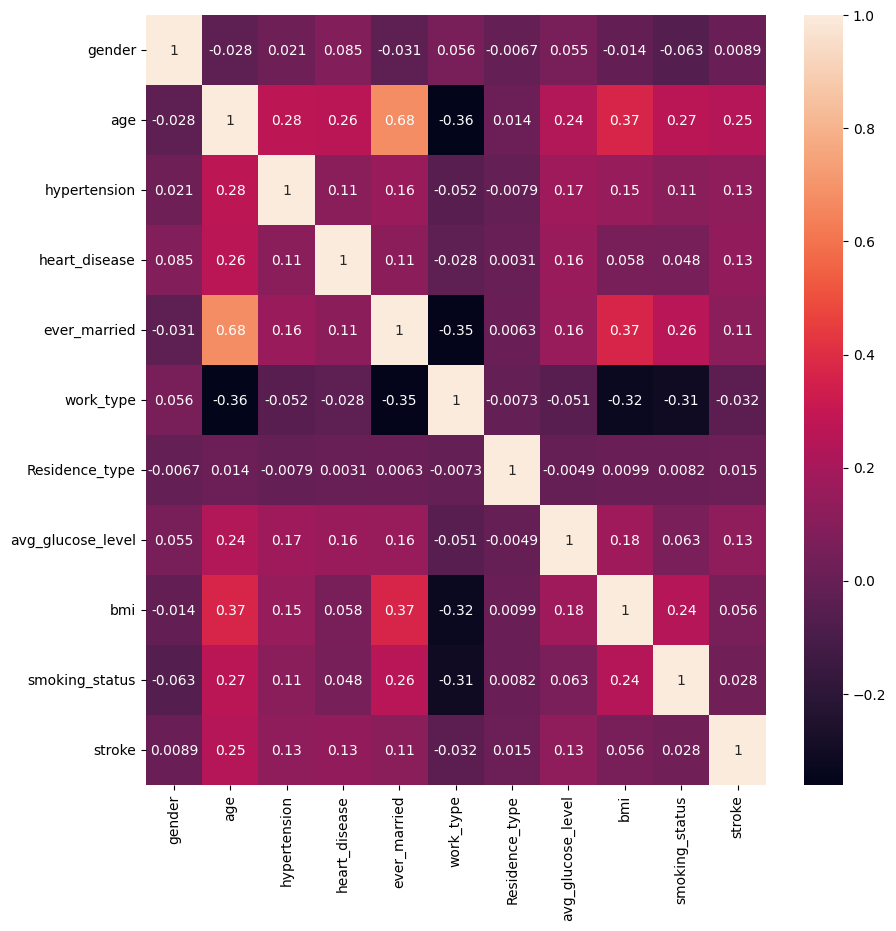

In [ ]:
#replotando o heatmap da correlação agora com todas as colunas
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)

In [ ]:
#Cria X e y
X = df.drop(columns='stroke')
y = df['stroke']

In [ ]:
#Criamos um modelo
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

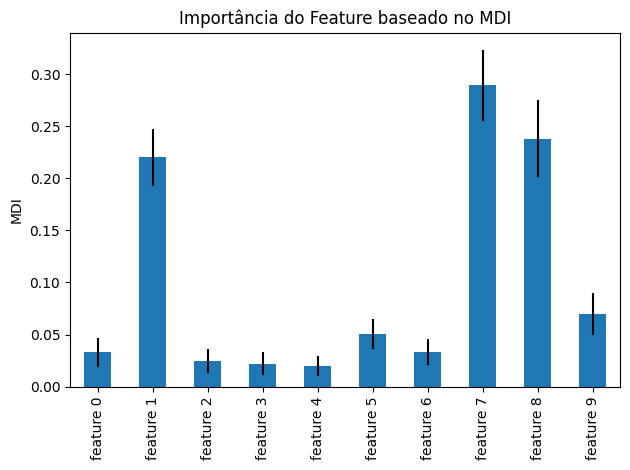

In [ ]:
#Verificando o grau de importância das features
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Importância do Feature baseado no MDI")
ax.set_ylabel("MDI")
fig.tight_layout()

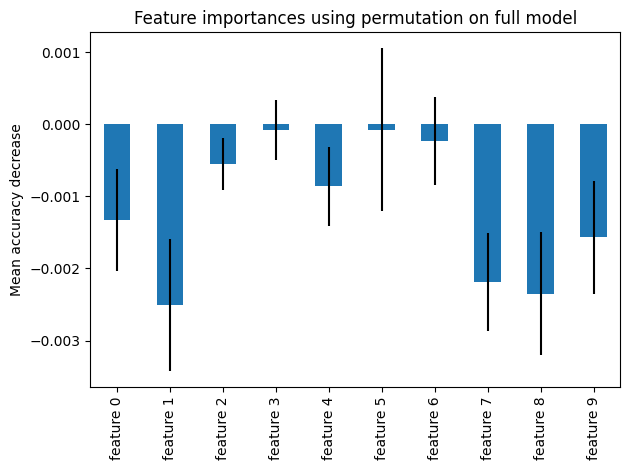

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=feature_names)


fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Aparentemente, a coluna strokes tem maior correlação com a idade, com o imc e com o status de fumante do paciente

In [ ]:
#Descrição do dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5110.0,0.414286,0.493044,0.00,0.000,0.000,1.00,2.00
age,5110.0,43.226614,22.612731,0.00,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
ever_married,5110.0,0.656164,0.475034,0.00,0.000,1.000,1.00,1.00
work_type,5110.0,2.167710,1.090293,0.00,2.000,2.000,3.00,4.00
Residence_type,5110.0,0.508023,0.499985,0.00,0.000,1.000,1.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.563185,6.763030,15.10,23.700,28.250,32.40,49.90
smoking_status,5110.0,1.376908,1.071534,0.00,0.000,2.000,2.00,3.00


In [ ]:
#Aplicamos um scaler nas coluna idade, media de glicose e imc
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_escalado = df

df_escalado[['age', 'avg_glucose_level', 'bmi' ]] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi' ]])

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5110.0,0.414286,0.493044,0.0,0.000000,0.000000,1.000000,2.0
age,5110.0,0.527154,0.275765,0.0,0.304878,0.548780,0.743902,1.0
hypertension,5110.0,0.097456,0.296607,0.0,0.000000,0.000000,0.000000,1.0
heart_disease,5110.0,0.054012,0.226063,0.0,0.000000,0.000000,0.000000,1.0
ever_married,5110.0,0.656164,0.475034,0.0,0.000000,1.000000,1.000000,1.0
work_type,5110.0,2.167710,1.090293,0.0,2.000000,2.000000,3.000000,4.0
Residence_type,5110.0,0.508023,0.499985,0.0,0.000000,1.000000,1.000000,1.0
avg_glucose_level,5110.0,0.235563,0.209046,0.0,0.102137,0.169721,0.272228,1.0
bmi,5110.0,0.386873,0.194340,0.0,0.247126,0.377874,0.497126,1.0
smoking_status,5110.0,1.376908,1.071534,0.0,0.000000,2.000000,2.000000,3.0


In [ ]:
#criando uma undersample do nosso dataset para treinar com menos demora
positive = df[df['stroke']==1]

In [ ]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             249 non-null    int64  
 1   age                249 non-null    float64
 2   hypertension       249 non-null    int64  
 3   heart_disease      249 non-null    int64  
 4   ever_married       249 non-null    int64  
 5   work_type          249 non-null    int64  
 6   Residence_type     249 non-null    int64  
 7   avg_glucose_level  249 non-null    float64
 8   bmi                249 non-null    float64
 9   smoking_status     249 non-null    int64  
 10  stroke             249 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 23.3 KB


In [ ]:
#pegando os negativos
df_filtrado = df_escalado[df_escalado['stroke'] == 0]
negative = df_filtrado.sample(n=747, random_state=42)

In [ ]:
negative.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,747.0,0.398929,0.490006,0.000000,0.000000,0.000000,1.000000,1.000000
age,747.0,0.516668,0.261497,0.000000,0.329268,0.524390,0.707317,1.000000
hypertension,747.0,0.105756,0.307732,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,747.0,0.042838,0.202627,0.000000,0.000000,0.000000,0.000000,1.000000
ever_married,747.0,0.688086,0.463585,0.000000,0.000000,1.000000,1.000000,1.000000
work_type,747.0,2.143240,1.072239,0.000000,2.000000,2.000000,3.000000,4.000000
Residence_type,747.0,0.487282,0.500173,0.000000,0.000000,0.000000,1.000000,1.000000
avg_glucose_level,747.0,0.230780,0.204986,0.000739,0.099922,0.165266,0.264218,0.962238
bmi,747.0,0.376162,0.192901,0.002874,0.238506,0.368650,0.479885,0.988506
smoking_status,747.0,1.376171,1.065732,0.000000,0.000000,2.000000,2.000000,3.000000


In [ ]:
df_concatenado = pd.concat([negative, positive], axis=0)

In [ ]:
df_concatenado.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,996.0,0.407631,0.491641,0.000000,0.000000,0.000000,1.000000,1.000000
age,996.0,0.593986,0.274283,0.000000,0.390244,0.621951,0.829268,1.000000
hypertension,996.0,0.145582,0.352864,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,996.0,0.079317,0.270369,0.000000,0.000000,0.000000,0.000000,1.000000
ever_married,996.0,0.736948,0.440512,0.000000,0.000000,1.000000,1.000000,1.000000
work_type,996.0,2.110442,1.034992,0.000000,2.000000,2.000000,3.000000,4.000000
Residence_type,996.0,0.501004,0.500250,0.000000,0.000000,1.000000,1.000000,1.000000
avg_glucose_level,996.0,0.262440,0.234266,0.000739,0.103234,0.178585,0.313452,1.000000
bmi,996.0,0.390793,0.187200,0.002874,0.258621,0.385057,0.485632,0.988506
smoking_status,996.0,1.409639,1.047067,0.000000,0.000000,2.000000,2.000000,3.000000


In [ ]:
df_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 2435 to 248
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             996 non-null    int64  
 1   age                996 non-null    float64
 2   hypertension       996 non-null    int64  
 3   heart_disease      996 non-null    int64  
 4   ever_married       996 non-null    int64  
 5   work_type          996 non-null    int64  
 6   Residence_type     996 non-null    int64  
 7   avg_glucose_level  996 non-null    float64
 8   bmi                996 non-null    float64
 9   smoking_status     996 non-null    int64  
 10  stroke             996 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 93.4 KB


In [ ]:
X = df_concatenado.drop(columns=['gender', 'stroke','heart_disease', "work_type", 'Residence_type'])
y = df_concatenado['stroke']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 2435 to 248
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                996 non-null    float64
 1   hypertension       996 non-null    int64  
 2   ever_married       996 non-null    int64  
 3   avg_glucose_level  996 non-null    float64
 4   bmi                996 non-null    float64
 5   smoking_status     996 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 54.5 KB


In [ ]:
X.shape, y.shape

((996, 6), (996,))

In [ ]:
#criando o pipeline e treinando
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)


print(f"Accuracy Score : {round(accuracy_score(y_test, prediction) * 100, 2)}%")

Accuracy Score : 80.0%


In [ ]:
y_pred_test = pipeline.predict(X_test)

[[135  15]
 [ 25  25]]


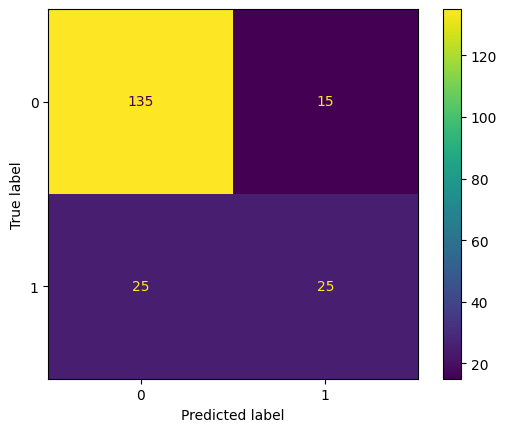



[[597   0]
 [  0 199]]


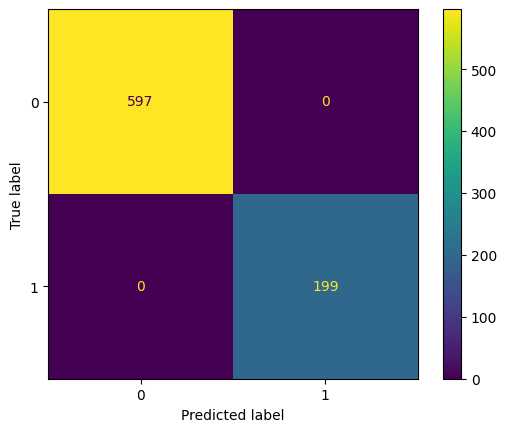

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print("\n===================\n")
y_pred_train = pipeline.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

Contudo lembramos que a fit sendo classificatoria, precisavamos usar a regressão logística

In [ ]:
# Aplicamos uma Regressãp Logística

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train,y_train)

LR_score = LR.score(X_train, y_train)
LR_test = LR.score(X_test, y_test)
print(f'(Lr_score: {LR_score})')
print(f'(Lr_test: {LR_test})')

(Lr_score: 0.8027638190954773)
(Lr_test: 0.815)


O modelo parece apresentar um score legal

Training Score 0.8027638190954773
Testing Score  0.815
[[135  15]
 [ 25  25]]


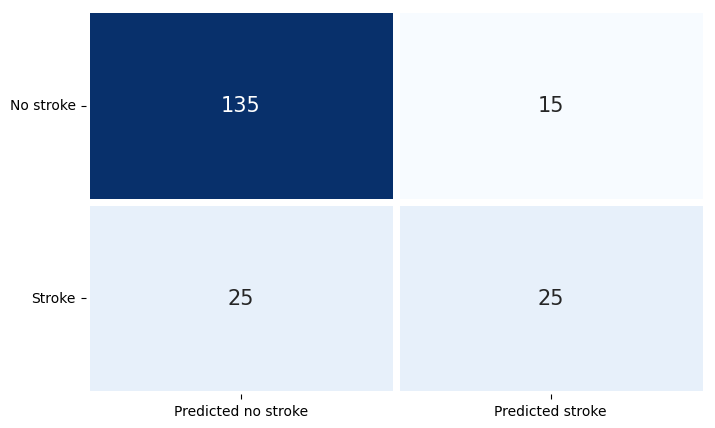

In [ ]:
#Testamos o modelo

y_pred = LR.predict(X_test)

#Avaliaremos o modelo na confusion matrix

cm = confusion_matrix(y_test,y_pred_test)
print('Training Score',LR_score)
print('Testing Score ',LR_test)
print(cm)

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)

LogisticRegression()

[[116  34]
 [ 10  40]]


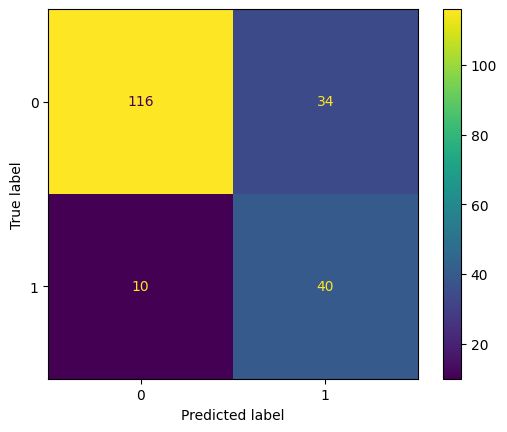



[[597   0]
 [  0 199]]


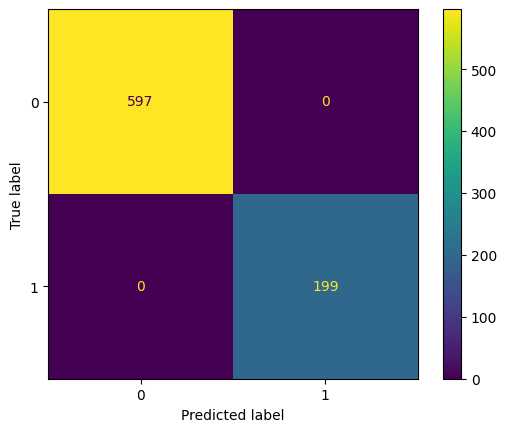

In [ ]:
# Ajustando o threshold da RegLog
y_pred_proba = reg_log.predict_proba(X_test)
threshold = 0.3
predicted_labels = (y_pred_proba[:,1] > threshold).astype(int)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(confusion_matrix(y_test, predicted_labels))

ConfusionMatrixDisplay.from_predictions(y_test, predicted_labels)
plt.show()

print("\n===================\n")
y_pred_train = pipeline.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

Depois do ajuste, tivemos uma melhor perfomance nas variáveis de teste, mas o modelo parece ainda estar overfitando devido ao resultado da confusion matrix das variáveis de treino

In [ ]:
#modelo parece estar overfitando, pois temos os dados muito desbalanceados
#vamos tratar com o kfold
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import recall_score, make_scorer, f1_score

grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
metrica = make_scorer(f1_score, pos_label=1)
results = cross_validate(
    LR,
    X=X_train,
    y=y_train,
    cv=grupo,
    scoring=metrica,
    return_train_score=True,
)

df_results = pd.DataFrame(results)

In [ ]:
df_results

,fit_time,score_time,test_score,train_score
0,0.010349,0.003128,0.540541,0.538206
1,0.006767,0.002836,0.413793,0.551948
2,0.006970,0.002992,0.536585,0.531987
3,0.006678,0.003633,0.500000,0.515050
4,0.007731,0.003220,0.413793,0.518519
5,0.006880,0.003184,0.588235,0.494845
6,0.007086,0.003314,0.642857,0.530744
7,0.006668,0.003515,0.294118,0.554455
8,0.007333,0.003516,0.514286,0.546053
9,0.008180,0.003067,0.615385,0.498294


O modelo continua patou de overfitar mas está com os scores mto baixos, então utilizaremos o método de undersampling para tentar treinar melhor o modelo, mas antes vamos usar o standard scale noa idade, no imc e na avg_glicose

In [ ]:
#Escalamos as coluns idade, imc e nivel médio de glicose
colunas_escalar = ['age', 'bmi', 'avg_glucose_level']
dados_escalar = df[colunas_escalar]
nao_escalar = df.drop(colunas_escalar, axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dados_escalar)
df_scaled = pd.DataFrame(scaled_data, columns=colunas_escalar)
df = pd.concat([df_scaled, nao_escalar ], axis=1)

In [ ]:
#importando o resample para fazer novamente uma undersample, mas desta vez 1 para 1
from sklearn.utils import resample

df_class_majoritaria = df[df['stroke'] == 0]
df_class_minoritaria = df[df['stroke'] == 1]

In [ ]:
#resampleando a amostra
df_class_majoritaria_undersampled = resample(df_class_majoritaria,
                                           replace=False,  # Sem substituição
                                           n_samples=len(df_class_minoritaria),  # Igualar ao tamanho da classe minoritária
                                           random_state=42)

In [ ]:
#criando um subdataset resampleado e balanceado
df_balanced = pd.concat([df_class_majoritaria_undersampled, df_class_minoritaria])

In [ ]:
#retreinar o modelo com o novo dataset
X = df_balanced.drop(columns=['gender', 'stroke','heart_disease', "work_type", 'Residence_type'])
y = df_balanced['stroke']

In [ ]:
X.shape, y.shape

((498, 6), (498,))

In [ ]:
#fizemos e testamos uma regressão logística para a nova amostra
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

LR = LogisticRegression()
LR.fit(X_train,y_train)
LR_score = LR.score(X_train, y_train)
LR_test = LR.score(X_test, y_test)

y_pred = LR.predict(X_test)

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)

In [ ]:
#criamos as predições com o novo modelo
y_pred_test = LR.predict(X_test)
y_pred_train = LR.predict(X_train)

[[36 14]
 [ 3 47]]


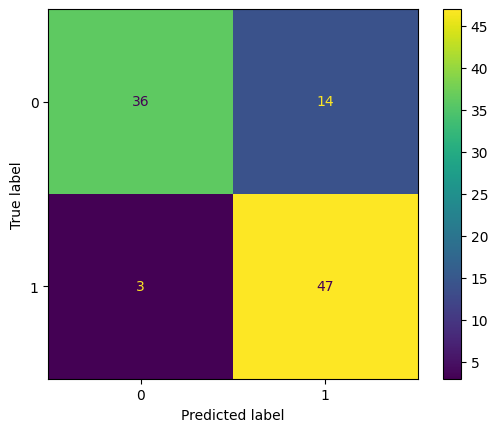



[[140  59]
 [ 41 158]]


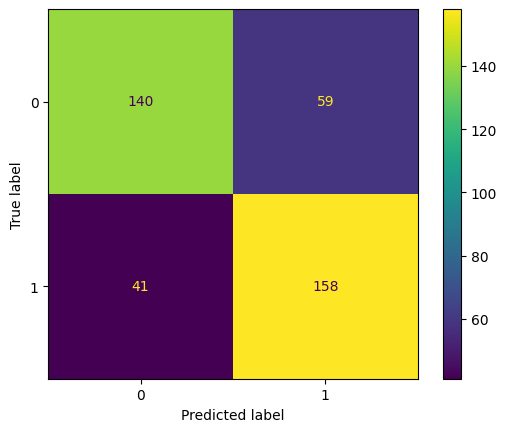

In [ ]:
#rodamos a confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print("\n===================\n")
y_pred_train = LR.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

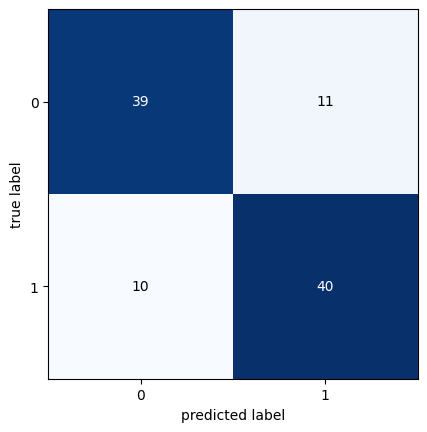

In [ ]:
# Ajustando o threshold da RegLog
from mlxtend.plotting import plot_confusion_matrix
y_pred_proba = LR.predict_proba(X_test)
threshold = 0.6
predicted_labels = (y_pred_proba[:,1] > threshold).astype(int)
cm = confusion_matrix(y_test, predicted_labels)
plot_confusion_matrix(conf_mat=cm)
plt.show()

O modelo está melhorando aos pouquinhos..rs

In [ ]:
#Verificando as métricas
print(classification_report(predicted_labels, y_test))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        49
           1       0.80      0.78      0.79        51

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   bmi                5110 non-null   float64
 2   avg_glucose_level  5110 non-null   float64
 3   gender             5110 non-null   int64  
 4   hypertension       5110 non-null   int64  
 5   heart_disease      5110 non-null   int64  
 6   ever_married       5110 non-null   int64  
 7   work_type          5110 non-null   int64  
 8   Residence_type     5110 non-null   int64  
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [ ]:
#rodamos com o dataset inteiro as predições treinadas com a base balancead
X = df.drop(columns=['gender', 'stroke','heart_disease', "work_type", 'Residence_type'])
y = df['stroke']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   bmi                5110 non-null   float64
 2   avg_glucose_level  5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   smoking_status     5110 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 239.7 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
y_pred_test = LR.predict(X_test)
y_pred_train = LR.predict(X_train)

[[717 255]
 [  8  42]]


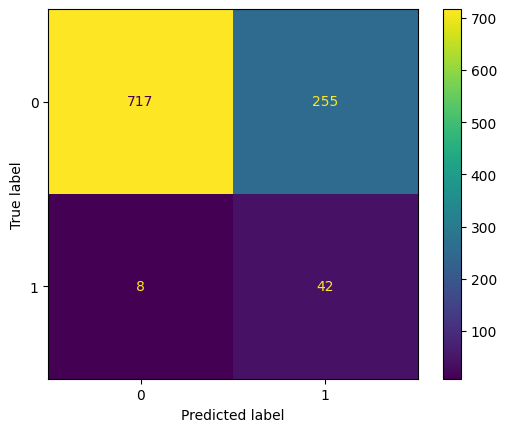



[[2813 1076]
 [  36  163]]


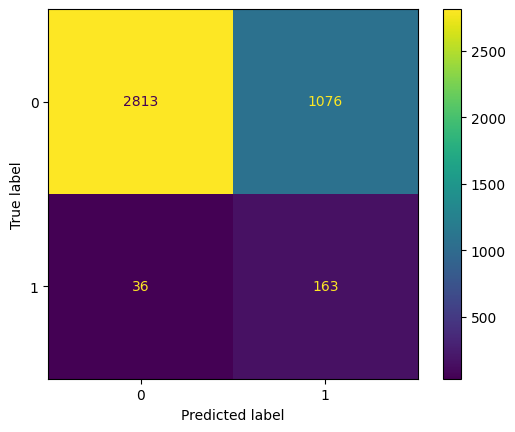

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print("\n===================\n")
y_pred_train = LR.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

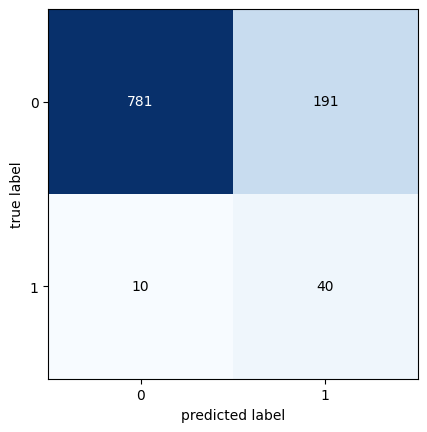

In [ ]:
# Ajustando o threshold da RegLog
from mlxtend.plotting import plot_confusion_matrix
y_pred_proba = LR.predict_proba(X_test)
threshold = 0.6
predicted_labels = (y_pred_proba[:,1] > threshold).astype(int)
cm = confusion_matrix(y_test, predicted_labels)
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
print(classification_report(predicted_labels, y_test))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89       791
           1       0.80      0.17      0.28       231

    accuracy                           0.80      1022
   macro avg       0.80      0.58      0.59      1022
weighted avg       0.80      0.80      0.75      1022



#Após ajustarmos os threshold, conseguimos uma predição com 80% de precisão nos resultados.
